# pyslammer demo: batch simulations
This notebook shows an example use case of pyslammer for running rigid, decoupled, and coupled sliding block analyses.

## Setup

Assumes pyslammer is installed in the current python environment. 
*Documentation on installation pending*, but for now, you can install it using pip:

```bash
pip install pyslammer
```

Import pyslammer using:

```python
import pyslammer as slam
```

Additional Python libraries, such as `matplotlib` may also be useful.



In [4]:
%matplotlib widget

In [5]:
import pyslammer as slam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# load in sample ground motions
histories = slam.sample_ground_motions()
motion_options = [print(history) for history in histories.keys()]

Morgan_Hill_1984_CYC-285
Nisqually_2001_UNR-058
Imperial_Valley_1979_BCR-230
Chi-Chi_1999_TCU068-090
Cape_Mendocino_1992_PET-090
Loalinga_1983_PVB-045
Coalinga_1983_PVB-045
Mammoth_Lakes-2_1980_CVK-090
Northridge_VSP-360
Kocaeli_1999_ATS-090
Nahanni_1985_NS1-280
Mammoth_Lakes-1_1980_CVK-090
Duzce_1999_375-090
Loma_Prieta_1989_HSP-000
Landers_1992_LCN-345
N_Palm_Springs_1986_WWT-180
Kobe_1995_TAK-090
Coyote_Lake_1979_G02-050


In [7]:
ky = 0.2
motion = "Kobe_1995_TAK-090"
accel = histories[motion].accel
dt = histories[motion].dt

# create dictionary of input parameters for rigid block analysis
rigid_inputs = {
    "a_in": accel,
    "dt": dt,
    "ky": ky
}

# additional terms needed for dynamic analysis:
height = 50.0
vs_slope = 600.0
vs_base = 600.0
damp_ratio = 0.05
ref_strain = 0.0005
scale_factor = 1.0
soil_model = "equivalent_linear"

# create dictionary of input parameters for dynamic (coupled and decoupled) sliding block analysis
dynamic_inputs = {
    "height": height,
    "vs_slope": vs_slope,
    "vs_base": vs_base,
    "damp_ratio": damp_ratio,
    "ref_strain": ref_strain,
    "scale_factor": scale_factor,
    "soil_model": soil_model
}

## Rigid block analysis

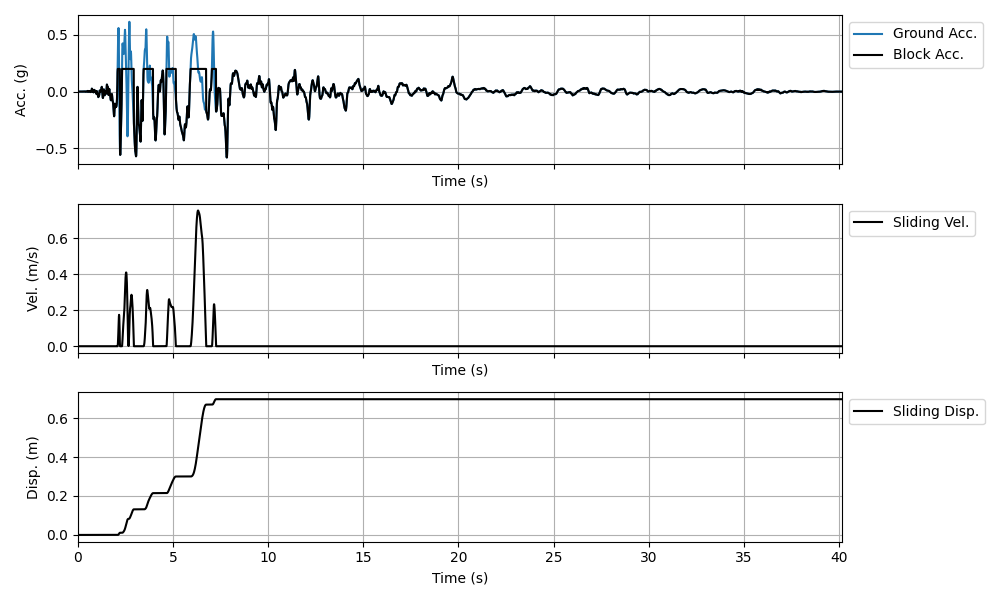

In [8]:
rigid_result = slam.RigidAnalysis(**rigid_inputs)
# plt.close('all')
fig, axs = rigid_result.sliding_block_plot()
plt.show()

## Decoupled sliding block analysis
Some refactoring is needed to send the correct decoupled analysis attributes to the `sliding_block_plot` method, but 
the block displacement is calculated as expected.

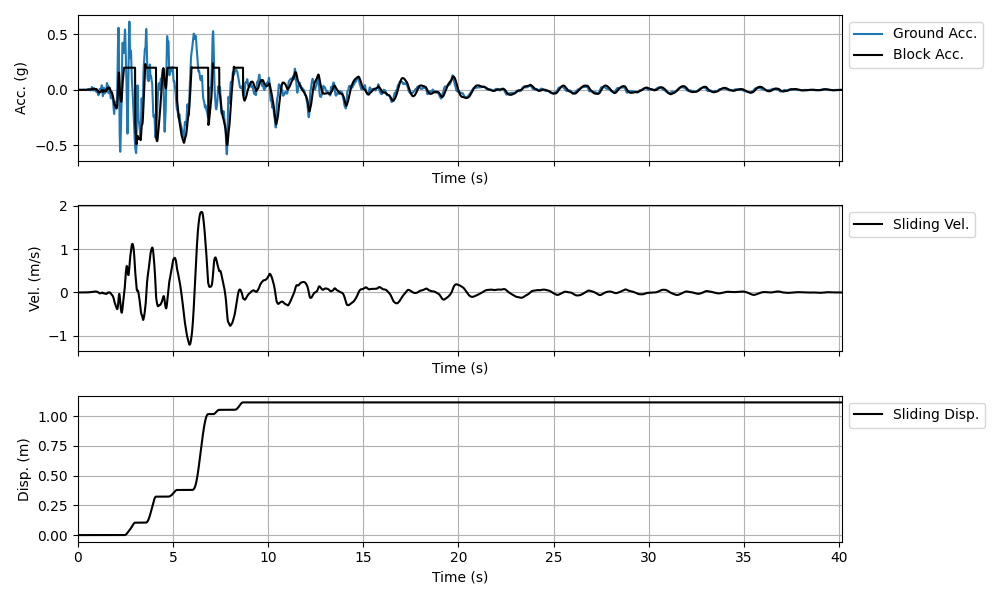

In [9]:
decoupled_result = slam.Decoupled(**rigid_inputs,**dynamic_inputs)
# plt.close('all')
fig, axs = decoupled_result.sliding_block_plot()
plt.show()

## Coupled sliding block analysis
Some refactoring is needed to send the correct coupled analysis attributes to the `sliding_block_plot` method, but 
the block displacement is calculated as expected.

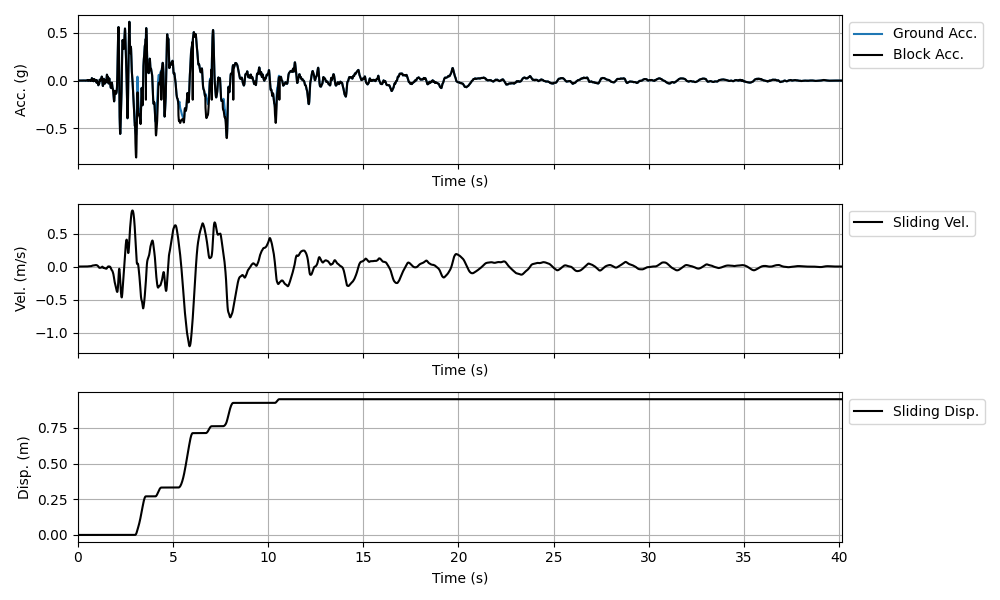

In [10]:
coupled_result = slam.Coupled(**rigid_inputs,**dynamic_inputs)
# plt.close('all')
fig, axs = coupled_result.sliding_block_plot()
plt.show()

## Comparison of analysis methods

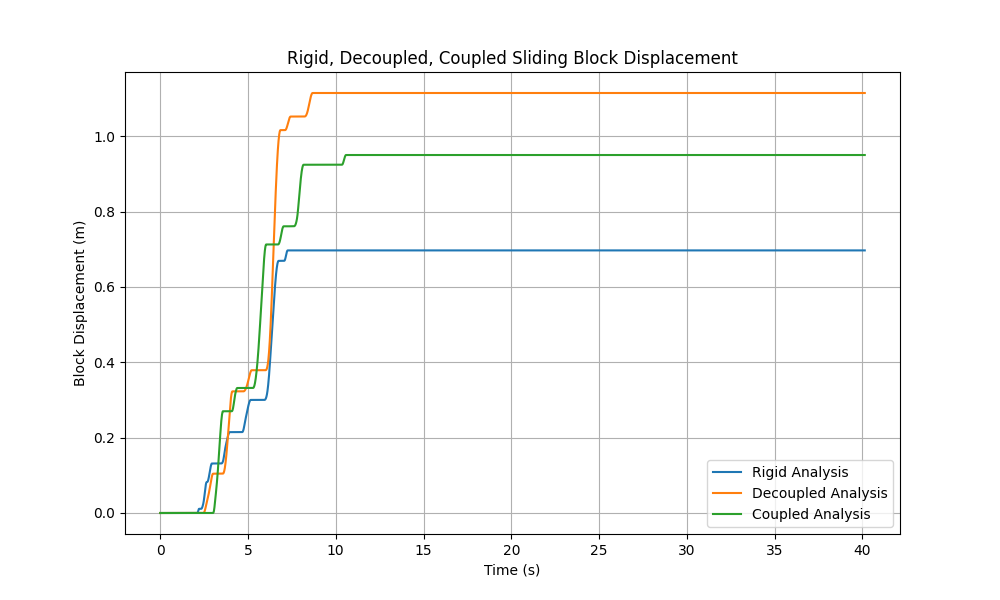

In [11]:
plt.figure(figsize=(10, 6))

time = np.arange(0, len(accel) * dt, dt)

# Plot block displacement vs time for each analysis method
plt.plot(time, rigid_result.sliding_disp, label='Rigid Analysis')
plt.plot(time, decoupled_result.sliding_disp, label='Decoupled Analysis')
plt.plot(time, coupled_result.sliding_disp, label='Coupled Analysis')

# Add labels and legend
plt.xlabel('Time (s)')
plt.ylabel('Block Displacement (m)')
plt.title('Rigid, Decoupled, Coupled Sliding Block Displacement')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()